# Importing the Libraries

In [ ]:
import numpy as np   # Importing numpy library
import pandas as pd   # Importing pandas library for data analysis
import matplotlib.pyplot as plt  #  Importing matplotlib.pyplot library for visualization
import re       # Importing re module
import seaborn as sns   #  Importing seaborn library for data vissualization


from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Dataset Information:

* Loan_ID----------------> Unique Loan ID.
* Gender ----------------> Male/ Female
* Married ---------------> Applicant married (Y/N)
* Dependents ------------> Number of dependents
* Education -------------> Applicant Education (Graduate/ Under Graduate)
* Self_Employed ---------> Self-employed (Y/N)
* ApplicantIncome -------> Applicant income
* CoapplicantIncome -----> Coapplicant income
* LoanAmount ------------> Loan amount in thousands
* Loan_Amount_Term ------> Term of a loan in months
* Credit_History --------> Credit history meets guidelines
* Property_Area ---------> Urban/ Semi-Urban/ Rural
* Loan_Status -----------> Loan approved (Y/N)

# EDA

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/customer loan eligibility project/Training Data.csv')

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/customer loan eligibility project/Testing Data.csv')

In [ ]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
len(train_df)

614

# Cleaning training data

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train_df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
train_df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
train_df.Gender.fillna('Female', inplace = True)

In [ ]:
train_df.Gender.value_counts()

Male      489
Female    125
Name: Gender, dtype: int64

In [ ]:
enc = LabelEncoder()

In [ ]:
train_df.Gender = enc.fit_transform(train_df.Gender)

In [ ]:
train_df.Gender.value_counts()

1    489
0    125
Name: Gender, dtype: int64

In [ ]:
#1 - male
# 0 - female

In [ ]:
train_df.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
train_df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
train_df.Married.fillna('No',inplace = True)
train_df.Married.value_counts()

Yes    398
No     216
Name: Married, dtype: int64

In [ ]:
train_df.Married = enc.fit_transform(train_df.Married)

In [ ]:
train_df.Married.value_counts()

1    398
0    216
Name: Married, dtype: int64

In [ ]:
# 1- yes
# 0- no

In [ ]:
train_df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
train_df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
train_df.Dependents.replace('3+','3',inplace = True)

In [ ]:
train_df.Dependents.value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [ ]:
train_df.Dependents.fillna(0,inplace = True)

In [ ]:
train_df.Dependents.value_counts()

0    345
1    102
2    101
3     51
0     15
Name: Dependents, dtype: int64

In [ ]:
train_df.Dependents = train_df.Dependents.astype('int')

In [ ]:
train_df.Dependents.value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(4), object(5)
memory usage: 62.5+ KB


In [ ]:
train_df.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [ ]:
train_df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [ ]:
train_df.Education.isna().sum()

0

In [ ]:
train_df.Education.replace('Not Graduate','Non_Graduate',inplace = True)

In [ ]:
train_df.Education = enc.fit_transform(train_df.Education)

In [ ]:
train_df.Education.value_counts()

0    480
1    134
Name: Education, dtype: int64

In [ ]:
# 0 - graduate
# 1 - not graduate

In [ ]:
train_df.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
train_df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
train_df.Self_Employed.fillna('Yes', inplace = True)

In [ ]:
train_df.Self_Employed = enc.fit_transform(train_df.Self_Employed)

In [ ]:
train_df.Self_Employed.value_counts()

0    500
1    114
Name: Self_Employed, dtype: int64

In [ ]:
# 0- no
# 1- yes

In [ ]:
train_df.ApplicantIncome.unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(6), object(3)
memory usage: 62.5+ KB


In [ ]:
train_df.CoapplicantIncome = train_df.CoapplicantIncome.astype('int')

In [ ]:
train_df.CoapplicantIncome.value_counts()

0       273
2500      5
2083      5
1666      5
2250      3
       ... 
2791      1
1010      1
1695      1
2598      1
240       1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [ ]:
train_df.LoanAmount.isna().sum()

22

In [ ]:
train_df.LoanAmount.mean()

146.41216216216216

In [ ]:
train_df.LoanAmount.median()

128.0

In [ ]:
train_df.LoanAmount.describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [ ]:
train_df.LoanAmount.fillna(train_df.LoanAmount.mean(),inplace = True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    int64  
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(7), object(3)
memory usage: 62.5+ KB


In [ ]:
train_df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [ ]:
# Loan_Amount_Term ------> Term of a loan in months

In [ ]:
train_df.Loan_Amount_Term.isna().sum()

14

In [ ]:
train_df.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0,146.412162,360.0,1.0,Urban,Y
1,LP001003,1,1,1,0,0,4583,1508,128.000000,360.0,1.0,Rural,N
2,LP001005,1,1,0,0,1,3000,0,66.000000,360.0,1.0,Urban,Y
3,LP001006,1,1,0,1,0,2583,2358,120.000000,360.0,1.0,Urban,Y
4,LP001008,1,0,0,0,0,6000,0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0,71.000000,360.0,1.0,Rural,Y
610,LP002979,1,1,3,0,0,4106,0,40.000000,180.0,1.0,Rural,Y
611,LP002983,1,1,1,0,0,8072,240,253.000000,360.0,1.0,Urban,Y
612,LP002984,1,1,2,0,0,7583,0,187.000000,360.0,1.0,Urban,Y


In [ ]:
train_df.Loan_Amount_Term.mean()

342.0

In [ ]:
train_df.Loan_Amount_Term.median()

360.0

In [ ]:
train_df.Loan_Amount_Term.fillna(360.0,inplace = True)

In [ ]:
train_df.Loan_Amount_Term.isna().sum()

0

In [ ]:
train_df.Loan_Amount_Term = train_df.Loan_Amount_Term.astype('int')

In [ ]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0,146.412162,360,1.0,Urban,Y
1,LP001003,1,1,1,0,0,4583,1508,128.000000,360,1.0,Rural,N
2,LP001005,1,1,0,0,1,3000,0,66.000000,360,1.0,Urban,Y
3,LP001006,1,1,0,1,0,2583,2358,120.000000,360,1.0,Urban,Y
4,LP001008,1,0,0,0,0,6000,0,141.000000,360,1.0,Urban,Y


In [ ]:
# Credit_History --------> Credit history meets guidelines

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    int64  
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    int64  
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(2), int64(8), object(3)
memory usage: 62.5+ KB


In [ ]:
train_df.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [ ]:
train_df.Property_Area.isna().sum()

0

In [ ]:
train_df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
train_df.Property_Area = enc.fit_transform(train_df.Property_Area)

In [ ]:
train_df.Property_Area.value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [ ]:
# 1 - Semiurban
# 2- Urban
# 0- Rural

In [ ]:
train_df.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [ ]:
train_df.Loan_Status.isna().sum()

0

In [ ]:
train_df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
train_df.Loan_Status = enc.fit_transform(train_df.Loan_Status)

In [ ]:
train_df.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [ ]:
# 1 -  y
# 0 - n

In [ ]:
train_df.Credit_History.unique()

array([ 1.,  0., nan])

In [ ]:
train_df.Credit_History.isna().sum()

50

In [ ]:
train_df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
# 1 - loan
# 0 - no loan

In [ ]:
train_df.Credit_History.fillna(2.0,inplace = True)

In [ ]:
train_df.Credit_History.value_counts()

1.0    475
0.0     89
2.0     50
Name: Credit_History, dtype: int64

In [ ]:
train_df.Credit_History = train_df.Credit_History.astype(int)

In [ ]:
train_df.Credit_History.value_counts()

1    475
0     89
2     50
Name: Credit_History, dtype: int64

In [ ]:
train_df[(train_df.Credit_History == 2) & (train_df.Loan_Status == 1)]['Credit_History']

16     2
42     2
79     2
86     2
117    2
125    2
130    2
156    2
187    2
198    2
219    2
237    2
260    2
279    2
309    2
313    2
317    2
318    2
323    2
348    2
363    2
377    2
392    2
395    2
411    2
444    2
451    2
460    2
473    2
490    2
491    2
497    2
506    2
530    2
544    2
556    2
565    2
Name: Credit_History, dtype: int64

In [ ]:
len(train_df[(train_df.Credit_History == 2) & (train_df.Loan_Status == 0)])

13

In [ ]:
(len(train_df.Loan_Status))

614

In [ ]:
train_df['Credit_History'][1]

1

In [ ]:
train_df.duplicated().sum()

0

In [ ]:
train_df.Credit_History.value_counts()

1    475
0     89
2     50
Name: Credit_History, dtype: int64

In [ ]:
train_df.Credit_History == 2

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Name: Credit_History, Length: 614, dtype: bool

In [ ]:
for i in range(614):
  if (train_df.Credit_History.loc[i] == 2) & (train_df.Loan_Status.loc[i] == 0):
    train_df.Credit_History.loc[i] = 0
  elif (train_df.Credit_History.loc[i] == 2) & (train_df.Loan_Status.loc[i] == 1):
    train_df.Credit_History.loc[i] = 1


<ipython-input-96-2c09c2764de4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.Credit_History.loc[i] = 1
<ipython-input-96-2c09c2764de4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.Credit_History.loc[i] = 0


In [ ]:
train_df.Credit_History.value_counts()

1    512
0    102
Name: Credit_History, dtype: int64

In [ ]:
train_df.drop('Loan_ID',axis = 1, inplace = True)

In [ ]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0,146.412162,360,1,2,1
1,1,1,1,0,0,4583,1508,128.000000,360,1,0,0
2,1,1,0,0,1,3000,0,66.000000,360,1,2,1
3,1,1,0,1,0,2583,2358,120.000000,360,1,2,1
4,1,0,0,0,0,6000,0,141.000000,360,1,2,1


# Cleaning Testing Dataset

In [ ]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
test_df.drop('Loan_ID', axis = 1, inplace = True)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [ ]:
test_df.Gender.isna().sum()

11

In [ ]:
test_df.Gender.value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [ ]:
test_df.Gender.fillna('Female',inplace = True)

In [ ]:
test_df.Gender = enc.fit_transform(test_df.Gender)

In [ ]:
test_df.Gender.value_counts()

1    286
0     81
Name: Gender, dtype: int64

In [ ]:
test_df.Married.value_counts()

Yes    233
No     134
Name: Married, dtype: int64

In [ ]:
test_df.Married.isna().sum()

0

In [ ]:
test_df.Married = enc.fit_transform(test_df.Married)

In [ ]:
test_df.Married.value_counts()

1    233
0    134
Name: Married, dtype: int64

In [ ]:
test_df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
test_df.Dependents.isna().sum()

10

In [ ]:
test_df.Dependents.value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [ ]:
test_df.Dependents.fillna('0',inplace = True)

In [ ]:
test_df.Dependents.value_counts()

0     210
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [ ]:
test_df.Dependents.replace('3+','3',inplace = True)

In [ ]:
test_df.Dependents = test_df.Dependents.astype('int')

In [ ]:
test_df.Education.isna().sum()

0

In [ ]:
test_df.Education.value_counts()

Graduate        283
Not Graduate     84
Name: Education, dtype: int64

In [ ]:
test_df.Education = enc.fit_transform(test_df.Education)

In [ ]:
test_df.Education.value_counts()

0    283
1     84
Name: Education, dtype: int64

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int64  
 1   Married            367 non-null    int64  
 2   Dependents         367 non-null    int64  
 3   Education          367 non-null    int64  
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(6), object(2)
memory usage: 31.7+ KB


In [ ]:
test_df.Self_Employed.isna().sum()

23

In [ ]:
test_df.Self_Employed.value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [ ]:
len(test_df[(test_df.Self_Employed == 'Yes') & (test_df.ApplicantIncome > 5000)])

17

In [ ]:
len(test_df[(test_df.Self_Employed == 'No') & (test_df.ApplicantIncome > 5000)])

68

In [ ]:
len(test_df[(test_df.Self_Employed == 'Yes') & (test_df.ApplicantIncome < 5000)])

19

In [ ]:
test_df.Self_Employed.fillna('No',inplace = True)

In [ ]:
test_df.Self_Employed = enc.fit_transform(test_df.Self_Employed)

In [ ]:
test_df.Self_Employed.value_counts()

0    330
1     37
Name: Self_Employed, dtype: int64

In [ ]:
test_df.Self_Employed.unique()

array([0, 1])

In [ ]:
test_df.ApplicantIncome.isna().sum()

0

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    int64  
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    int64  
 9   Credit_History     614 non-null    int64  
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 57.7 KB


In [ ]:
test_df.LoanAmount.isna().sum()

5

In [ ]:
test_df.LoanAmount.value_counts()

150.0    12
125.0    11
110.0    10
100.0     9
90.0      9
         ..
71.0      1
157.0     1
93.0      1
61.0      1
98.0      1
Name: LoanAmount, Length: 144, dtype: int64

In [ ]:
test_df.LoanAmount.median()

125.0

In [ ]:
test_df.LoanAmount.fillna(test_df.LoanAmount.median(),inplace = True)

In [ ]:
test_df.LoanAmount.isna().sum()

0

In [ ]:
test_df.Loan_Amount_Term.value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
test_df.Loan_Amount_Term.isna().sum()

6

In [ ]:
test_df.Loan_Amount_Term.median()

360.0

In [ ]:
test_df.Loan_Amount_Term.fillna(test_df.Loan_Amount_Term.median(),inplace = True)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int64  
 1   Married            367 non-null    int64  
 2   Dependents         367 non-null    int64  
 3   Education          367 non-null    int64  
 4   Self_Employed      367 non-null    int64  
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(7), object(1)
memory usage: 31.7+ KB


In [ ]:
test_df.Loan_Amount_Term = test_df.Loan_Amount_Term.astype('int')

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int64  
 1   Married            367 non-null    int64  
 2   Dependents         367 non-null    int64  
 3   Education          367 non-null    int64  
 4   Self_Employed      367 non-null    int64  
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    int64  
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(2), int64(8), object(1)
memory usage: 31.7+ KB


In [ ]:
test_df.Credit_History.isna().sum()

29

In [ ]:
test_df.Credit_History.unique()

array([ 1., nan,  0.])

In [ ]:
test_df.Credit_History.fillna(2.0, inplace = True)

In [ ]:
test_df.Credit_History.value_counts()

1.0    279
0.0     59
2.0     29
Name: Credit_History, dtype: int64

In [ ]:
test_df.Credit_History.replace(2.0,0.0, inplace = True)

In [ ]:
test_df.Credit_History = test_df.Credit_History.astype('int')

In [ ]:
test_df.Credit_History.value_counts()

1    279
0     88
Name: Credit_History, dtype: int64

In [ ]:
test_df.Credit_History.isna().sum()

0

In [ ]:
test_df.Property_Area.isna().sum()

0

In [ ]:
test_df.Property_Area.value_counts()

Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64

In [ ]:
test_df.Property_Area = enc.fit_transform(test_df.Property_Area)

In [ ]:
test_df.Property_Area.value_counts()

2    140
1    116
0    111
Name: Property_Area, dtype: int64

In [ ]:
# 1 - Semiurban
# 2- Urban
# 0- Rural

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int64  
 1   Married            367 non-null    int64  
 2   Dependents         367 non-null    int64  
 3   Education          367 non-null    int64  
 4   Self_Employed      367 non-null    int64  
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    int64  
 9   Credit_History     367 non-null    int64  
 10  Property_Area      367 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 31.7 KB


In [ ]:
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360,1,2
1,1,1,1,0,0,3076,1500,126.0,360,1,2
2,1,1,2,0,0,5000,1800,208.0,360,1,2
3,1,1,2,0,0,2340,2546,100.0,360,0,2
4,1,0,0,1,0,3276,0,78.0,360,1,2


# Analysis

In [ ]:
# Male Female Ratio
train_df.Gender.value_counts()

1    489
0    125
Name: Gender, dtype: int64

In [ ]:
print(f'Male Female ratio is:-> 489:125')

Male Female ratio is:-> 489:125


In [ ]:
# How many Males are married and non-married?
print(f"The no. of married males is : {train_df[(train_df.Gender == 1 ) & (train_df.	Married == 1)]['Gender'].count()}")

print(f"The no. of non-married males is : {train_df[(train_df.Gender == 1 ) & (train_df.	Married == 0)]['Gender'].count()}")

The no. of married males is : 357
The no. of non-married males is : 132


In [ ]:
# How many Females are married and non-married?
print(f"The no. of married females is : {train_df[(train_df.Gender == 0 ) & (train_df.	Married == 1)]['Gender'].count()}")

print(f"The no. of non-married females is : {train_df[(train_df.Gender == 0) & (train_df.	Married == 0)]['Gender'].count()}")

The no. of married females is : 41
The no. of non-married females is : 84


In [ ]:
# How many Males and Females are graduated and non-graduated with respect to their Marital status?
train_df[(train_df.Gender == 1) & (train_df.Education	 == 0 )][['Gender','Education','Married']]

,Gender,Education,Married
0,1,0,0
1,1,0,1
2,1,0,1
4,1,0,0
5,1,0,1
...,...,...,...
606,1,0,1
608,1,0,1
610,1,0,1
611,1,0,1


In [ ]:
train_df[(train_df.Gender == 1 ) & (train_df.Education	 == 1 )][['Gender','Education','Married']]  # 1 - not graduate, 0 - graduate
                                                                                                    # 1 - male, 0 - female

,Gender,Education,Married
3,1,1,1
6,1,1,1
16,1,1,0
18,1,1,1
20,1,1,1
...,...,...,...
595,1,1,0
596,1,1,1
601,1,1,1
605,1,1,1


In [ ]:
train_df[(train_df.Gender == 0) & (train_df.Education	 == 0)][['Gender','Education','Married']]

,Gender,Education,Married
17,0,0,0
29,0,0,0
37,0,0,1
45,0,0,0
48,0,0,1
...,...,...,...
592,0,0,0
600,0,0,0
604,0,0,1
609,0,0,0


In [ ]:
train_df[(train_df.Gender == 0 ) & (train_df.Education	 == 1 )][['Gender','Education','Married']]

,Gender,Education,Married
23,0,1,1
50,0,1,1
197,0,1,0
205,0,1,0
279,0,1,1
338,0,1,0
403,0,1,0
407,0,1,0
410,0,1,0
414,0,1,1


In [ ]:
# Which type of encoding will be required to perform on the "Education" column?
# labelEncoding cause of ordinal data

In [ ]:
train_df.LoanAmount.nlargest(1)

171    700.0
Name: LoanAmount, dtype: float64

In [ ]:
# Is it a male or a female whose loan amount is the highest?
train_df[train_df.LoanAmount == 700.0][['Gender','LoanAmount']]

,Gender,LoanAmount
171,0,700.0


In [ ]:
print('The highest loan amount is for female')

The highest loan amount is for female


In [ ]:
# total loan amount for males and females
train_df.LoanAmount.sum()

89897.06756756757

In [ ]:
print(f"Total Loan amount for males is : {train_df[train_df.Gender == 1][['LoanAmount']].sum()}")

Total Loan amount for males is : LoanAmount    72936.831081
dtype: float64


In [ ]:
print(f"Total Loan amount for males is : {train_df[train_df.Gender == 0][['LoanAmount']].sum()}")


Total Loan amount for males is : LoanAmount    16960.236486
dtype: float64


In [ ]:
print('for males loan amount is the highest')

for males loan amount is the highest


In [ ]:
16960.236486 + 72936.831081

89897.06756699999

In [ ]:
# the specification and information about the applicant who has the highest income?
print(train_df.ApplicantIncome.nlargest(1))
train_df.loc[train_df.ApplicantIncome == 81000]

409    81000
Name: ApplicantIncome, dtype: int64


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,1,1,3,0,0,81000,0,360.0,360,0,0,0


# Feature Selection

In [ ]:
train_df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.339026,0.148500,0.061497,-0.039440,0.013933,0.082316,0.064609,-0.070288,0.002549,-0.017054,0.025407
Married,0.339026,1.000000,0.340684,0.017671,-0.016628,0.050194,0.080496,0.145643,-0.103381,0.010238,0.000395,0.084281
Dependents,0.148500,0.340684,1.000000,0.055752,0.042142,0.118202,0.030429,0.163106,-0.103864,-0.048068,-0.000244,0.010118
Education,0.061497,0.017671,0.055752,1.000000,-0.019059,-0.140760,-0.062290,-0.166998,-0.073928,-0.071397,-0.065243,-0.085884
Self_Employed,-0.039440,-0.016628,0.042142,-0.019059,1.000000,0.121356,0.028834,0.112118,-0.039740,-0.000696,-0.022732,0.005857
ApplicantIncome,0.013933,0.050194,0.118202,-0.140760,0.121356,1.000000,-0.116604,0.565620,-0.046531,-0.010051,-0.009500,-0.004710
CoapplicantIncome,0.082316,0.080496,0.030429,-0.062290,0.028834,-0.116604,1.000000,0.187829,-0.059382,-0.054737,0.010521,-0.059188
LoanAmount,0.064609,0.145643,0.163106,-0.166998,0.112118,0.565620,0.187829,1.000000,0.036475,-0.023608,-0.044776,-0.036416
Loan_Amount_Term,-0.070288,-0.103381,-0.103864,-0.073928,-0.039740,-0.046531,-0.059382,0.036475,1.000000,-0.007758,-0.076120,-0.022549
Credit_History,0.002549,0.010238,-0.048068,-0.071397,-0.000696,-0.010051,-0.054737,-0.023608,-0.007758,1.000000,0.004565,0.595642


<Axes: >

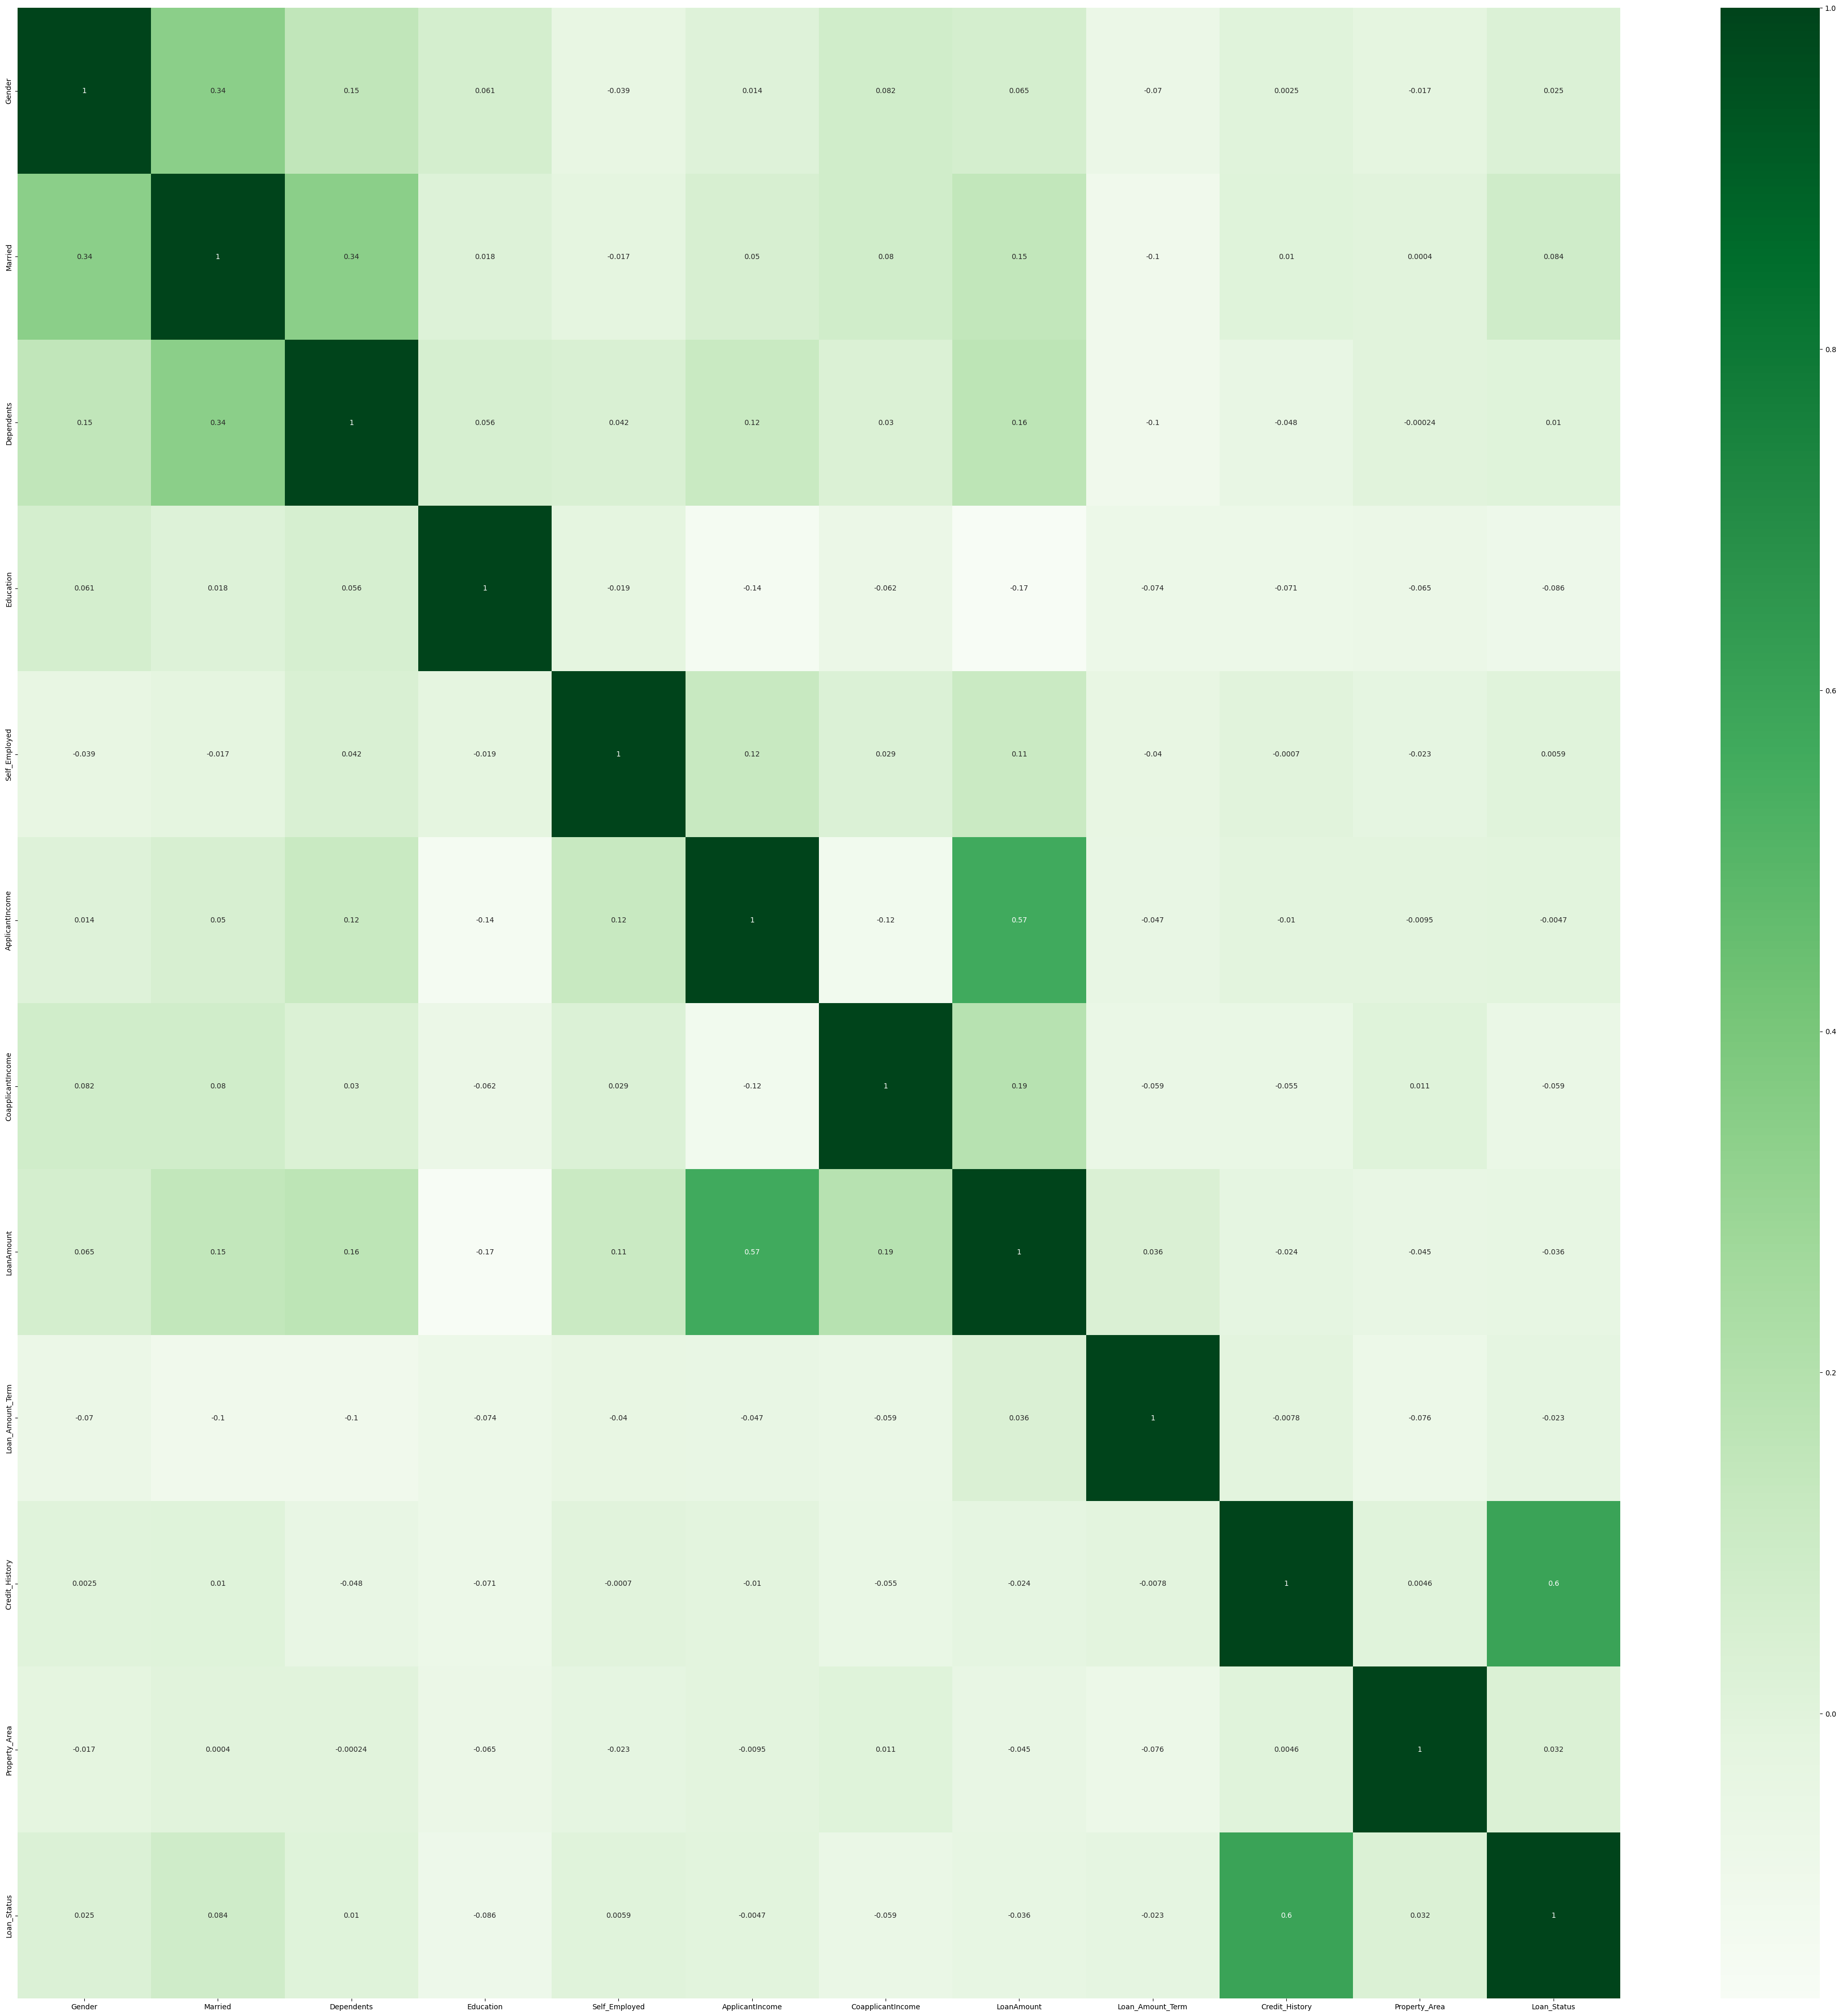

In [ ]:
plt.figure(figsize = (50,50))
sns.heatmap(train_df.corr(), annot = True, cmap = 'Greens')

In [ ]:
X = train_df.drop('Loan_Status',axis = 1)
y = train_df.Loan_Status

In [ ]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0,146.412162,360,1,2
1,1,1,1,0,0,4583,1508,128.000000,360,1,0
2,1,1,0,0,1,3000,0,66.000000,360,1,2
3,1,1,0,1,0,2583,2358,120.000000,360,1,2
4,1,0,0,0,0,6000,0,141.000000,360,1,2


In [ ]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [ ]:
model = ExtraTreesClassifier()

In [ ]:
model.fit(X,y)

ExtraTreesClassifier()

In [ ]:
model.feature_importances_

array([0.01999096, 0.01757832, 0.05516956, 0.0189684 , 0.02288774,
       0.1663471 , 0.10401357, 0.16456783, 0.0465186 , 0.33874744,
       0.04521048])

In [ ]:
important_features = pd.Series(model.feature_importances_,
                               index = X.columns)

In [ ]:
important_features

Gender               0.019991
Married              0.017578
Dependents           0.055170
Education            0.018968
Self_Employed        0.022888
ApplicantIncome      0.166347
CoapplicantIncome    0.104014
LoanAmount           0.164568
Loan_Amount_Term     0.046519
Credit_History       0.338747
Property_Area        0.045210
dtype: float64

In [ ]:
important_features.sort_values('index', ascending = False)

<ipython-input-188-8c66806ac6b4>:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  important_features.sort_values('index', ascending = False)


Credit_History       0.338747
ApplicantIncome      0.166347
LoanAmount           0.164568
CoapplicantIncome    0.104014
Dependents           0.055170
Loan_Amount_Term     0.046519
Property_Area        0.045210
Self_Employed        0.022888
Gender               0.019991
Education            0.018968
Married              0.017578
dtype: float64

<Axes: >

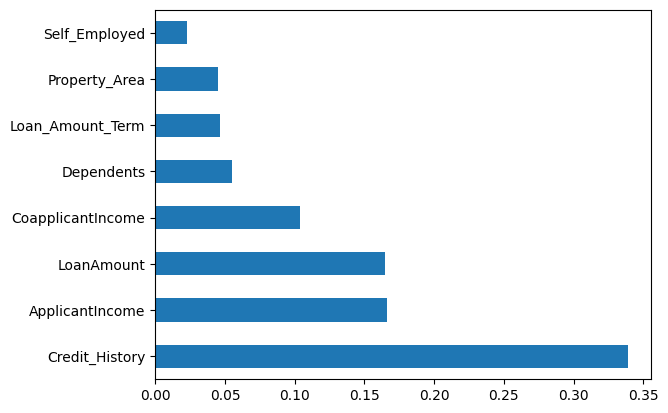

In [ ]:
important_features.nlargest(8).plot(kind = 'barh')

In [ ]:
# What all features are you going to consider for the model training and why? (Give the appropriate reason for choosing such features among others)


We are selecting top 8 features that are more important among 11 features.
Gender, Marrital status, and Education are least important for getting loan. Hence we are not considering them.

# Splitting the Dataset with Stratified K-Fold

* we are creating validation set

In [ ]:
skf = StratifiedKFold(n_splits = 5)

In [ ]:
for train_index, test_index in skf.split(X,y):
  X_train, X_estt = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
len(X_train)

492

In [ ]:
len(X_test)

122

In [ ]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0,146.412162,360,1,2
1,1,1,1,0,0,4583,1508,128.000000,360,1,0
2,1,1,0,0,1,3000,0,66.000000,360,1,2
3,1,1,0,1,0,2583,2358,120.000000,360,1,2
4,1,0,0,0,0,6000,0,141.000000,360,1,2
...,...,...,...,...,...,...,...,...,...,...,...
487,1,1,1,0,0,18333,0,500.000000,360,1,2
488,1,1,2,0,1,4583,2083,160.000000,360,1,1
489,1,0,0,0,0,2435,0,75.000000,360,1,2
490,1,0,0,1,0,2699,2785,96.000000,360,1,1


In [ ]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
491,1,1,1,1,0,5333,1131,186.0,360,1,2
492,1,0,0,1,0,3691,0,110.0,360,1,0
493,0,0,0,1,1,17263,0,225.0,360,1,1
495,0,1,1,0,0,3326,913,105.0,84,1,1
496,1,1,0,1,0,2600,1700,107.0,360,1,0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0,71.0,360,1,0
610,1,1,3,0,0,4106,0,40.0,180,1,0
611,1,1,1,0,0,8072,240,253.0,360,1,2
612,1,1,2,0,0,7583,0,187.0,360,1,2


In [ ]:
y_train

0      1
1      0
2      1
3      1
4      1
      ..
487    0
488    1
489    0
490    1
494    0
Name: Loan_Status, Length: 492, dtype: int64

In [ ]:
y_test

491    1
492    1
493    1
495    1
496    1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 122, dtype: int64

# Model Selection

In [ ]:
nb_model = GaussianNB()
dc_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
svc_model = SVC()
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression()

# Traininng The Model

# Naive Bayes

In [ ]:
nb_model.fit(X_train, y_train)
nb_y_predict = nb_model.predict(X_test)

In [ ]:
print(accuracy_score(y_test, nb_y_predict), ": is the accuracy score")

0.8278688524590164 : is the accuracy score


# Decision Tree Model

In [ ]:
dc_model.fit(X_train, y_train)
dc_y_predict = dc_model.predict(X_test)

In [ ]:
print(f'{accuracy_score(y_test,dc_y_predict)} is the accuracy score')

0.7622950819672131 is the accuracy score


# Random Forest Model

* Performing the Hyper Parameter Tuning to get the best parametric value for the model using RandomizedSearchCV

In [ ]:
# No. of trees in a random forest
n_estimators = [int(i) for i in range(100, 1201, 100)]

# No. of features to consider at every split
max_features = ['sqrt', 1.0]

# Maximun number of levels in a tree
max_depth = [int(i) for i in range(5,31,5)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [ ]:
random_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf
}

In [ ]:
rf_random = RandomizedSearchCV(estimator = model,
                               param_distributions = random_grid,
                               scoring = 'neg_mean_squared_error',
                               n_jobs = 1,
                               random_state = 42,
                               verbose = 2,
                               cv = 5)

In [ ]:
rf_random.fit(X_train, y_train)
rf_y_predict = rf_random.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=15, max_features=1.0, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.7s
[CV] END max_depth=15, max_features=1.0, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.8s
[CV] END max_depth=15, max_features=1.0, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; 

In [ ]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 15}

In [ ]:
print(f'{accuracy_score(y_test, rf_y_predict)} is the accuracy score')

0.8524590163934426 is the accuracy score


# KNN Model

In [ ]:
arr = [i for i in range(1,50) if i%2!=0]

for i in arr:
  knn_model = KNeighborsClassifier(n_neighbors=i)
  knn_model.fit(X_train,y_train)
  knn_y_predict = knn_model.predict(X_test)
  print(f'K={i} -> Accuracy is {accuracy_score(y_test, knn_y_predict)}')

K=1 -> Accuracy is 0.6065573770491803
K=3 -> Accuracy is 0.6147540983606558
K=5 -> Accuracy is 0.6147540983606558
K=7 -> Accuracy is 0.639344262295082
K=9 -> Accuracy is 0.6475409836065574
K=11 -> Accuracy is 0.6557377049180327
K=13 -> Accuracy is 0.6639344262295082
K=15 -> Accuracy is 0.680327868852459
K=17 -> Accuracy is 0.7049180327868853
K=19 -> Accuracy is 0.6885245901639344
K=21 -> Accuracy is 0.6885245901639344
K=23 -> Accuracy is 0.680327868852459
K=25 -> Accuracy is 0.680327868852459
K=27 -> Accuracy is 0.680327868852459
K=29 -> Accuracy is 0.6885245901639344
K=31 -> Accuracy is 0.6885245901639344
K=33 -> Accuracy is 0.6885245901639344
K=35 -> Accuracy is 0.6885245901639344
K=37 -> Accuracy is 0.6885245901639344
K=39 -> Accuracy is 0.6885245901639344
K=41 -> Accuracy is 0.6885245901639344
K=43 -> Accuracy is 0.6885245901639344
K=45 -> Accuracy is 0.6885245901639344
K=47 -> Accuracy is 0.6885245901639344
K=49 -> Accuracy is 0.6885245901639344


for k = 17 the accuracy is maximum

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 17)

In [ ]:
knn_model.fit(X_train, y_train)
knn_y_predict = knn_model.predict(X_test)

In [ ]:
print(f'Accuracy is {accuracy_score(y_test, knn_y_predict)}')

Accuracy is 0.7049180327868853


# Logistic Regression
* Logistic regression does not really have any critical hyperparameters to tune.

In [ ]:
lr_model.fit(X_train, y_train)
lr_y_predict = lr_model.predict(X_test)

In [ ]:
accuracy_score(y_test,lr_y_predict)

0.8442622950819673

# SVC Model

In [ ]:
svc_model.fit(X_train, y_train)
svc_y_predict = svc_model.predict(X_test)

In [ ]:
accuracy_score(y_test,svc_y_predict)

0.6885245901639344

In [ ]:
final = pd.DataFrame({"Actual": y_test,
                      "Naive Bayes Classifier": nb_y_predict,
                      "Decision Tree Classifier": dc_y_predict,
                      "Random Forest Classifier": rf_y_predict,
                      "Support Vector Classifier": svc_y_predict,
                      "KNN Classifier": knn_y_predict,
                      "Logistic Regression Classifier": lr_y_predict,})

In [ ]:
final

,Actual,NBC,DTC,RFC,SVC,KNN,LRC
491,1,1,1,1,1,1,1
492,1,1,1,1,1,1,1
493,1,1,0,1,1,1,1
495,1,1,1,1,1,1,1
496,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
609,1,1,1,1,1,1,1
610,1,1,1,1,1,1,1
611,1,1,1,1,1,1,1
612,1,1,1,1,1,1,1


# Acc

In [ ]:
print(f'Naive Bayes: {accuracy_score(y_test, nb_y_predict)}')
print(f'Decision Tree: {accuracy_score(y_test, dc_y_predict)}')
print(f'Random Forest: {accuracy_score(y_test, rf_y_predict)}')
print(f'SVC: {accuracy_score(y_test, svc_y_predict)}')
print(f'KNN: {accuracy_score(y_test, knn_y_predict)}')
print(f'Logistic Regression: {accuracy_score(y_test, lr_y_predict)}')

Naive Bayes: 0.8278688524590164
Decision Tree: 0.7622950819672131
Random Forest: 0.8524590163934426
SVC: 0.6885245901639344
KNN: 0.7049180327868853
Logistic Regression: 0.8442622950819673


* getting highest accuracy for Random Forest Classifier. So we are using Random Forest model for prediction of testing data i.e. test_df and accuracy will be considered as the accuracy we got with the validation set/dataset.

In [ ]:
rf_y_predi = rf_random.predict(test_df)

In [ ]:
rf_y_predi

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360,1,2
1,1,1,1,0,0,3076,1500,126.0,360,1,2
2,1,1,2,0,0,5000,1800,208.0,360,1,2
3,1,1,2,0,0,2340,2546,100.0,360,0,2
4,1,0,0,1,0,3276,0,78.0,360,1,2


In [ ]:
rf_random.predict([[ 1,  0, 0, 1,  0,  10000, 0,
                     300, 360,1,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
new_test = test_df.copy()

In [ ]:
predicted_loan = pd.Series(rf_y_predi)

In [ ]:
new_test['Predicted_loan'] = predicted_loan

In [ ]:
new_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predicted_loan
0,1,1,0,0,0,5720,0,110.0,360,1,2,1
1,1,1,1,0,0,3076,1500,126.0,360,1,2,1
2,1,1,2,0,0,5000,1800,208.0,360,1,2,1
3,1,1,2,0,0,2340,2546,100.0,360,0,2,0
4,1,0,0,1,0,3276,0,78.0,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360,1,2,1
363,1,1,0,0,0,4158,709,115.0,360,1,2,1
364,1,0,0,0,0,3250,1993,126.0,360,0,1,0
365,1,1,0,0,0,5000,2393,158.0,360,1,0,1
